In [1]:
import _pickle, gzip, numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import itertools

%matplotlib inline

### 1. DATA EXPLORATION

First we load the data

In [2]:
f = gzip.open('mnist.pkl.gz','rb')
train_set, valid_set, test_set = _pickle.load(f,encoding='latin1')
f.close()

Let's separate the training set from the testing set into features (X) and labels (y)

In [3]:
X_train = train_set[0]
y_train = train_set[1]

X_test = test_set[0]
y_test = test_set[1]

The images are 28x28 (784) pixels.  There are 50,000 and 10,000 images in the training and testing set, respectively 

In [4]:
X_train.shape, X_test.shape

((50000, 784), (10000, 784))

There are 10 unique digits (0 thru 9) in our data set, and their values are:

In [5]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

#### Exercise 1.  Create a histogram that shows the number of images in the training and testing data set that belong to each digit.  

Create two histograms, one for the training set and one for the testing set.

**Tips:** Look at plt.hist and plt.subplot

In [ ]:
# Write code here




The data set seems fairly balanced with about 10% of the data belonging to each digit

#### Exercise 2.  Create a for loop that displays the first 30 images of the training hand digits.

**Tips:** Look at X_train[i].reshape() and plt.imshow()

In [ ]:
# Write code here




### 2. Using the pixels as features in a classifier

We are going to use all 784 pixels as the input features to train our model classifier.  There are dimensionality reduction techniques, such as Principal Component Analysis (PCA), that can be used; however, it goes beyond the scope of the work we will be covering today. 

For our Machine Learning model we are going to use SciKit-Learn.  To use the models it requires 3 operations:
- Instantiate
- Fit
- Predict

** Decision Trees **

The first model we are going to test out is a Decision Tree Classifier.   

** Exercise 3. Create a Decision Tree object with a max_depth=2 and random_state=0.  Fit the training set.  Predict the testing set. Use an accuracy score to determine how well your model performed. **

** Tips:** Look at DecisionTreeClassifier(), accuracy_score()

In [ ]:
# Write code here




#### Parameter Tuning

In the example above we used a max_depth = 2.  Could there be a better value for max_depth?

#### Exercise 4. Write a function that receives a value of max_depth, creates and Decision Tree object (random_state=0), fits the training set, predicts the testing set and returns the accuracy score.

In [ ]:
# Write code here
def DTFunc(max_depth):

    
    

#### Exercise 5.  Create a for loop that loops for several max_depths values between 5 and 20.  Save the accuracy of max_depth in a list.

**Note:** It may take a few minutes to run

In [ ]:
# Write code here




#### Exercise 6.  Create a plot of the max_depths versus accuracy and determine the max_depth that produces the maximum accuracy

In [ ]:
# Write code here




#### Exercise 7. Re-run your Decision Tree classifier only using the optimum max_depth

In [ ]:
# Write code here




Below is a function that calculates a Confusion Matrix. Run the next three cells.

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",fontsize=15)

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)

In [14]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

Confusion matrix, without normalization


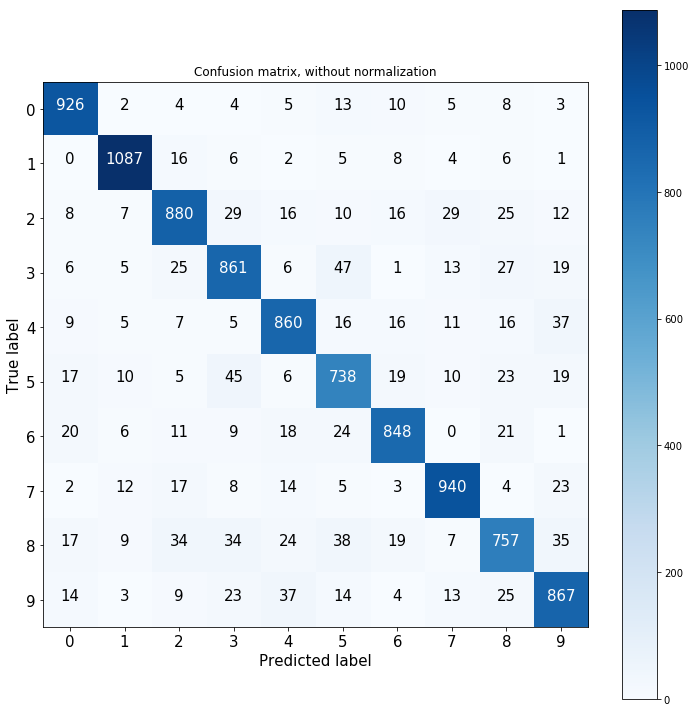

In [15]:
# Plot non-normalized confusion matrix
plt.figure(figsize=[10,10])
plot_confusion_matrix(cnf_matrix, classes=np.unique(y_test),
                      title='Confusion matrix, without normalization')

#### Random Forrests

We are now going to test a different model known as Random Forrests.

** Exercise 8. Create a Random Forrest object with a max_depth=2, n_estimators = 100 and random_state=0.  Fit the training set.  Predict the testing set. Use an accuracy score to determine how well your model performed. **

** Tips:** Look at RandomForrestClassifier(), accuracy_score()

In [ ]:
# Write code here




#### Parameter Tuning

In the example above we used a max_depth = 2 and n_estimators = 100.  Could there be a better value for max_depth or n_estimators? 

#### Exercise 9. Write a function that receives a value of max_depth and n_estimators, creates and Random Forrest object (random_state=0), fits the training set, predicts the testing set and returns the accuracy score.

In [ ]:
# Write code here
def RFFunc(max_depth,n_estimators):

    
    

#### Exercise 10.  Create a for loop that loops for several max_depths values of 5, 10 and 15 and n_estimators of 100, 200, 300.  Save the accuracy of max_depth in a list.

**Note:** It may take a few minutes to run

In [ ]:
# Write code here




Which max_depth and n_estimator produced the maximum accuracy?

#### Exercise 11. Re-run your Random Forrest classifier only using the optimum max_depth and n_estimator

In [ ]:
# Write code here




Run the 2 cells below to obtain the Confusion  Matrix

In [20]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

Confusion matrix, without normalization


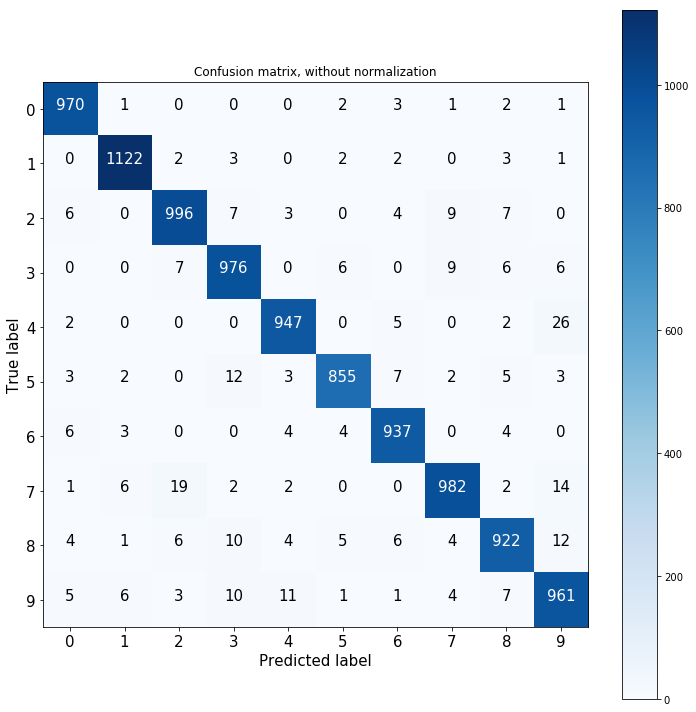

In [21]:
# Plot non-normalized confusion matrix
plt.figure(figsize=[10,10])
plot_confusion_matrix(cnf_matrix, classes=np.unique(y_test),
                      title='Confusion matrix, without normalization')

From the models tested, which should you use?

# ANSWERS

#### Answer 1

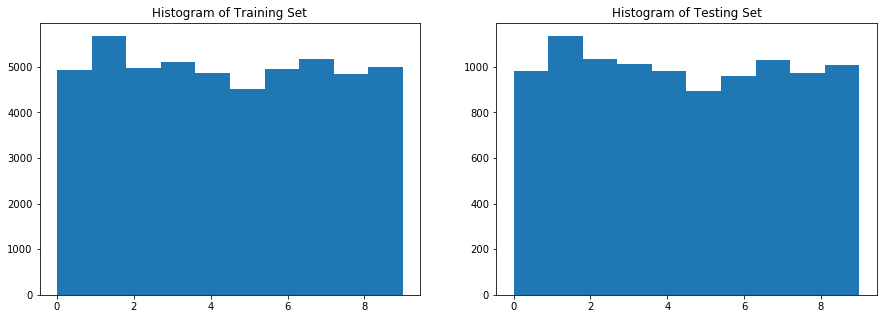

In [6]:
# histogram of the target value
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.hist(y_train,10);
plt.title('Histogram of Training Set')
plt.subplot(1,2,2)
plt.hist(y_test,10);
plt.title('Histogram of Testing Set')

#### Answer 2

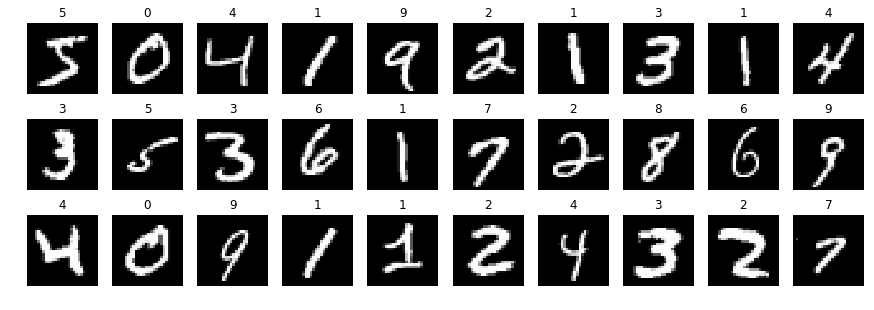

In [7]:
# let's visualize some of the data
plt.figure(figsize=[15,5])
for i in range(30):
    plt.subplot(3,10,i+1)
    plt.imshow(X_train[i].reshape(28,28),cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')

#### Answer 3

In [8]:
DT = DecisionTreeClassifier(max_depth=2, random_state=0)
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

print('Test Accuracy: ',  accuracy_score(y_test, y_pred))

Test Accuracy:  0.3447


#### Answer 4

In [9]:
def DTFunc(max_depth):
    DT = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    DT.fit(X_train, y_train)
    y_pred = DT.predict(X_test)

    return accuracy_score(y_test, y_pred)

#### Answer 5

In [10]:
DTAcc = []
max_depth_vals = range(5,21)
for i in max_depth_vals:
    print(i)
    DTAcc.append(DTFunc(i))

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


#### Answer 6

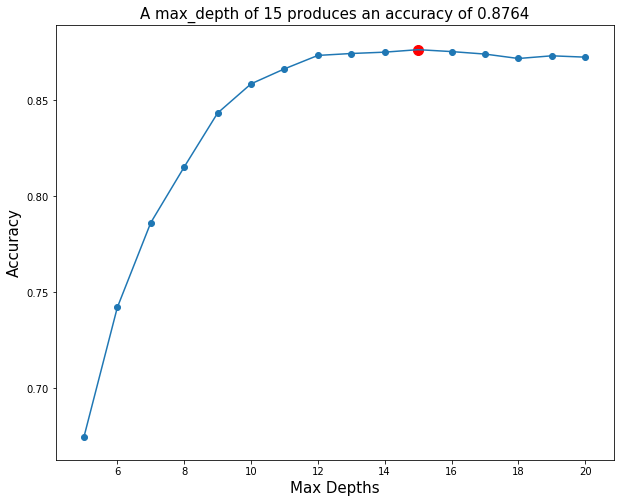

In [11]:
plt.figure(figsize=[10,8])
plt.plot(max_depth_vals,DTAcc)
plt.scatter(max_depth_vals,DTAcc)
plt.scatter(max_depth_vals[np.array(DTAcc).argmax()],max(DTAcc),c='r',s=100)
title = 'A max_depth of '+ str(max_depth_vals[np.array(DTAcc).argmax()])+' produces an accuracy of '+str(max(DTAcc))
plt.title(title,FontSize=15)
plt.xlabel('Max Depths',FontSize=15)
plt.ylabel('Accuracy',FontSize=15);

#### Answer 7

In [12]:
DT = DecisionTreeClassifier(max_depth=max_depth_vals[np.array(DTAcc).argmax()], random_state=0)
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

print('Test Accuracy: ',  accuracy_score(y_test, y_pred))

Test Accuracy:  0.8764


#### Answer 8

In [16]:
RF = RandomForestClassifier(n_estimators = 100, max_depth=2, random_state=0)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

print('Test Accuracy: ',  accuracy_score(y_test, y_pred))

Test Accuracy:  0.633


#### Answer 9

In [17]:
def RFFunc(max_depth,n_estimators):
    RF = RandomForestClassifier(n_estimators = n_estimators, max_depth=max_depth, random_state=0)
    RF.fit(X_train, y_train)
    y_pred = RF.predict(X_test)

    return accuracy_score(y_test, y_pred)

#### Answer 10

In [18]:
RFAcc = []
max_depth_vals = [5,10,15]
n_estimators_vals = [100, 200, 300]

for i in max_depth_vals:
    for j in n_estimators_vals:
        RFAcc.append(RFFunc(i,j))
        print(i,j,RFAcc[-1])

5 100 0.8623
5 200 0.8672
5 300 0.867
10 100 0.9489
10 200 0.9495
10 300 0.9491
15 100 0.9651
15 200 0.9668
15 300 0.9664


#### Answer 11

In [19]:
RF = RandomForestClassifier(n_estimators = 200, max_depth=15, random_state=0)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

print('Test Accuracy: ',  accuracy_score(y_test, y_pred))

Test Accuracy:  0.9668
